Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2024./2025.  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2025 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **3. studenog 2024. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [403]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [404]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [405]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [406]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Točnost: 1.0


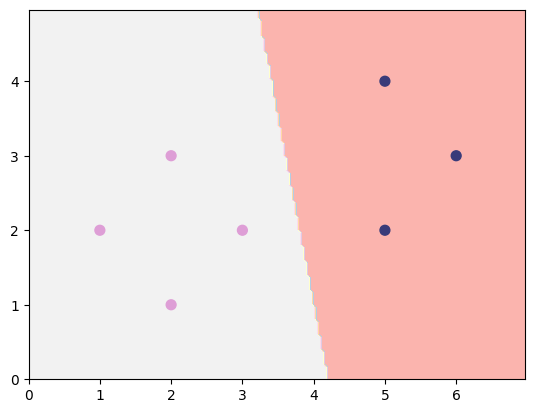

In [407]:
# Vaš kôd ovdje
ridge01 = RidgeClassifier(alpha=0).fit(seven_X, seven_y)
predict01 = ridge01.predict(seven_X)

plot_2d_clf_problem(seven_X, seven_y, ridge01.predict)

tocnost01 = accuracy_score(seven_y, predict01)
print("Točnost: " + str(tocnost01))


Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

Točnost: 1.0


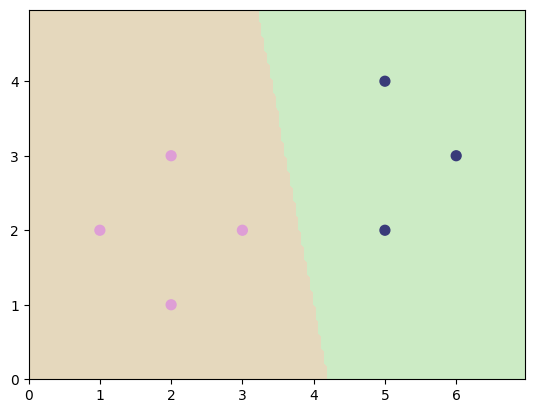

In [408]:
# Vaš kôd ovdje
linearRegression02 = LinearRegression().fit(seven_X, seven_y)

def lambda02Def(x):
    if x >= 0.5:
        return 1
    else:
        return 0

predict02 = []

for i in linearRegression02.predict(seven_X):
    predict02.append(lambda02Def(i))

plot_2d_clf_problem(seven_X, seven_y, lambda x: linearRegression02.predict(x) >= 0.5)

tocnost02 = accuracy_score(seven_y, predict02)
print("Točnost: " + str(tocnost02))

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [409]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Točnost: 0.875


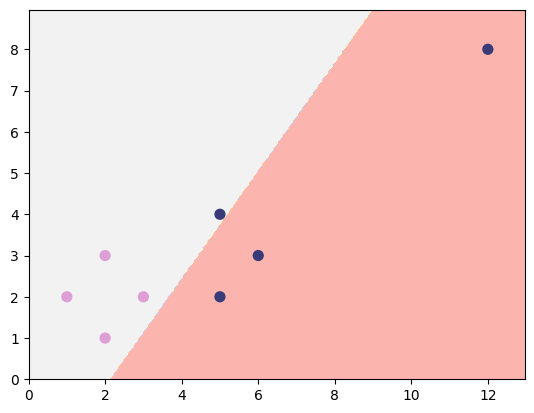

In [410]:
# Vaš kôd ovdje
ridge03 = RidgeClassifier(alpha=0).fit(outlier_X, outlier_y)
predict03 = ridge03.predict(outlier_X)

plot_2d_clf_problem(outlier_X, outlier_y, ridge03.predict)

tocnost03 = accuracy_score(outlier_y, predict03)
print("Točnost: " + str(tocnost03))

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [411]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Točnost: 0.875


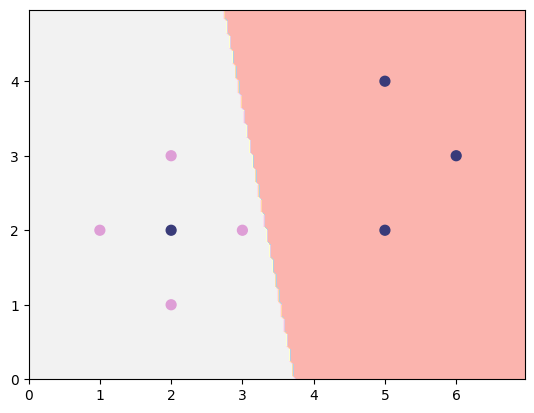

In [412]:
# Vaš kôd ovdje
ridge04 = RidgeClassifier(alpha=0).fit(unsep_X, unsep_y)
predict04 = ridge04.predict(unsep_X)

plot_2d_clf_problem(unsep_X, unsep_y, ridge04.predict)

tocnost04 = accuracy_score(unsep_y, predict04)
print("Točnost: " + str(tocnost04))


**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

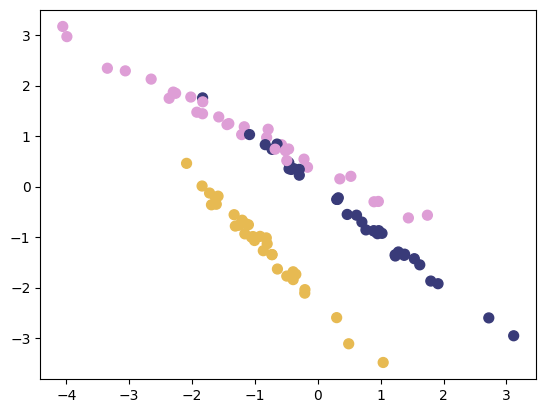

In [413]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
X2_1, y2_1 = make_classification(n_features= 2, n_classes=3, n_redundant=0, n_clusters_per_class=1)
plot_2d_clf_problem(X2_1, y2_1)


Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

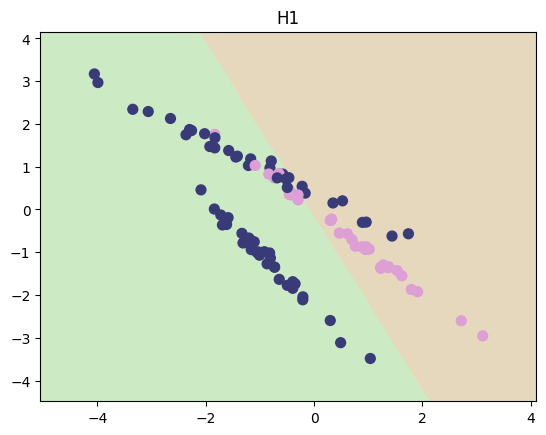

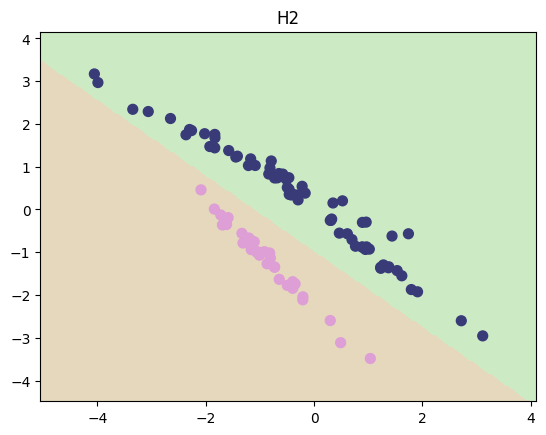

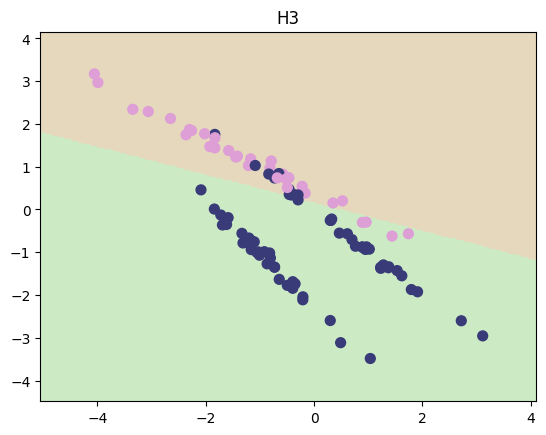

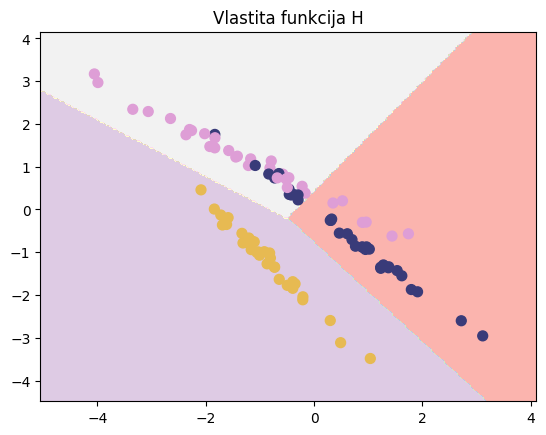

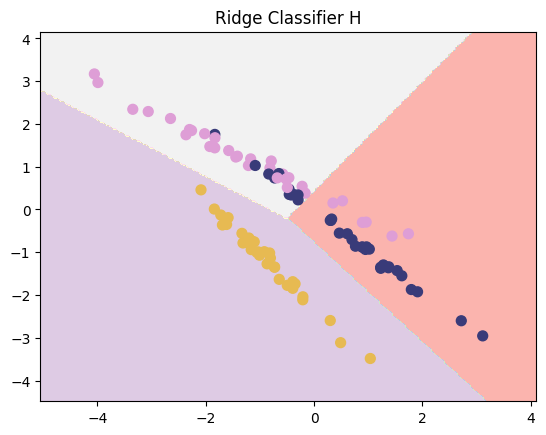

In [414]:
# Vaš kôd ovdje

#H1, H2, H3
def sorth1(x):
    if x == 0:
        return 1
    else:
        return 0
    
def sorth2(x):
    if x == 1:
        return 1
    else:
        return 0
    
def sorth3(x):
    if x == 2:
        return 1
    else:
        return 0

y2_2_h1 = []
y2_2_h2 = []
y2_2_h3 = []

for i in y2_1:
    y2_2_h1.append(sorth1(i))
    y2_2_h2.append(sorth2(i))
    y2_2_h3.append(sorth3(i))


linearRegression2_2_h1 = LinearRegression().fit(X2_1, y2_2_h1)
linearRegression2_2_h2 = LinearRegression().fit(X2_1, y2_2_h2)
linearRegression2_2_h3 = LinearRegression().fit(X2_1, y2_2_h3)

plot_2d_clf_problem(X2_1, y2_2_h1, lambda x: linearRegression2_2_h1.predict(x) >= 0.5)
plt.title("H1")
plt.show()
plot_2d_clf_problem(X2_1, y2_2_h2, lambda x: linearRegression2_2_h2.predict(x) >= 0.5)
plt.title("H2")
plt.show()
plot_2d_clf_problem(X2_1, y2_2_h3, lambda x: linearRegression2_2_h3.predict(x) >= 0.5)
plt.title("H3")
plt.show()

#Vlastita implementacija funkcije Predict

def predict2_2(x):
    h1 = linearRegression2_2_h1.predict(x)
    h2 = linearRegression2_2_h2.predict(x)
    h3 = linearRegression2_2_h3.predict(x)
    for i in range(x.shape[0]):
        if h1[i] > h2[i]:     
            if h1[i] > h3[i]: 
                h1[i] = 0     
            else:             
                h1[i] = 2     
        else:                 
            if h2[i] > h3[i]: 
                h1[i] = 1     
            else:             
                h1[i] = 2     
    return h1

plot_2d_clf_problem(X2_1, y2_1, lambda x: predict2_2(x))
plt.title("Vlastita funkcija H")
plt.show()


#Implementacija Ridge classifier-om
ridge2_2 = RidgeClassifier(alpha=0).fit(X2_1, y2_1)
plot_2d_clf_problem(X2_1, y2_1, lambda x: ridge2_2.predict(x))
plt.title("Ridge Classifier H")
plt.show()





### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

1000


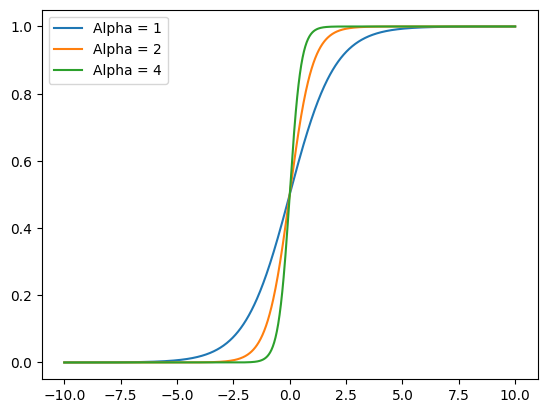

In [415]:
# Vaš kôd ovdje

def sigm(x, a = 1):
    return 1/(1 + np.exp(-a * x))

x = np.linspace(-10, 10, 1000)
a = [1, 2, 4]

print(len(x))

alpha1 = []
alpha2 = []
alpha4 = []


for xi in x:
    alpha1.append(sigm(xi, 1))
    alpha2.append(sigm(xi, 2))
    alpha4.append(sigm(xi, 4))

plt.plot(x, alpha1, label = "Alpha = 1")
plt.plot(x, alpha2, label = "Alpha = 2")
plt.plot(x, alpha4, label = "Alpha = 4")

plt.legend()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [416]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures


def lr_h(x,w):
    return sigm(np.transpose(w).dot(x))

def cross_entropy_error(X,y,w):
    h = []
    for xi in X:
        h.append(lr_h(xi, w))
    
    mySum = 0

    for i in range(len(y)):
        mySum += -y[i] * np.log(h[i]) - (1 - y[i]) * np.log(1 - h[i])

    expression = (1 / X.shape[0]) * mySum
    return expression





polynom3_2 = PolynomialFeatures()

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    # Vaš kôd ovdje
    
    xTemp = polynom3_2.set_params(degree=1).fit_transform(X)
    tezinaKrozIteracije = np.zeros(shape=(0, xTemp.shape[1]))
    trenutnaTezina = np.zeros(shape=(xTemp.shape[1],))
    konacnaIteracija = 0

    for iteracija in range(max_iter):
        konacnaIteracija = iteracija

        if iteracija > 0:
            trenutnaTezina = tezinaKrozIteracije[-1].copy()
        prijasnjaGreska = cross_entropy_error(xTemp, y, trenutnaTezina)
        deltaTezina = np.zeros(shape=(trenutnaTezina.shape[0],))

        for xi, yi in zip(xTemp, y):
            h = lr_h(xi, trenutnaTezina)
            deltaTezina -= (h - yi) * xi

        trenutnaTezina[0] += eta * deltaTezina[0]

        #regularizacija L2
        trenutnaTezina[1:] = trenutnaTezina[1:] * (1 - eta * alpha) + eta * deltaTezina[1:]

        tezinaKrozIteracije = np.append(tezinaKrozIteracije, [trenutnaTezina], axis = 0)

        treutnaGreska = cross_entropy_error(xTemp, y, trenutnaTezina)
        if(np.absolute(treutnaGreska - prijasnjaGreska) < epsilon):
            break
        
    print("Rješenje pronađeno u: " + str(konacnaIteracija + 1) + " iteraciji.")
    if trace:
        return tezinaKrozIteracije[-1], tezinaKrozIteracije
    else: 
        return tezinaKrozIteracije[-1]
    


### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [417]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Rješenje pronađeno u: 947 iteraciji.
Pogreška unakrsne entropije: 0.13521872720206743


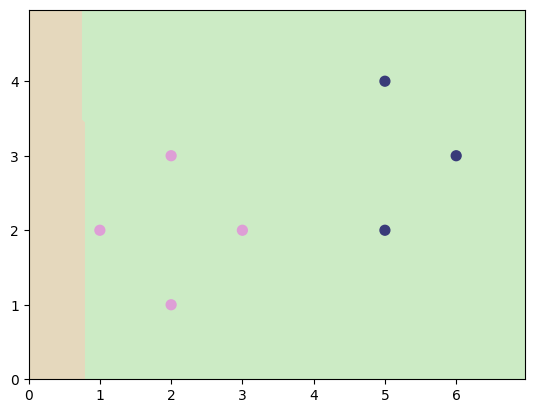

In [418]:
# Vaš kôd ovdje
tezine, tezinePoIteraciji = lr_train(seven_X, seven_y, max_iter=1000, trace=True)
greska = cross_entropy_error(polynom3_2.set_params(degree=1).fit_transform(seven_X), seven_y, tezine)
funkcijaH = lambda x: sigm(np.sum(w.T * polynom3_2.fit_transform(x), axis=1)) >= 0.5
print("Pogreška unakrsne entropije: " + str(greska))
plot_2d_clf_problem(seven_X, seven_y, funkcijaH)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [419]:
from sklearn.metrics import zero_one_loss

Rješenje pronađeno u: 1142 iteraciji.
Rješenje pronađeno u: 947 iteraciji.
Rješenje pronađeno u: 511 iteraciji.
Rješenje pronađeno u: 378 iteraciji.


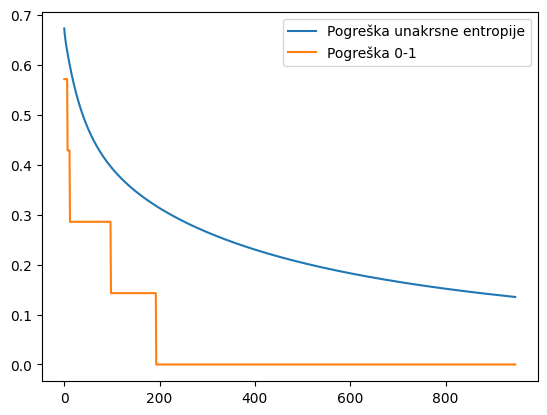

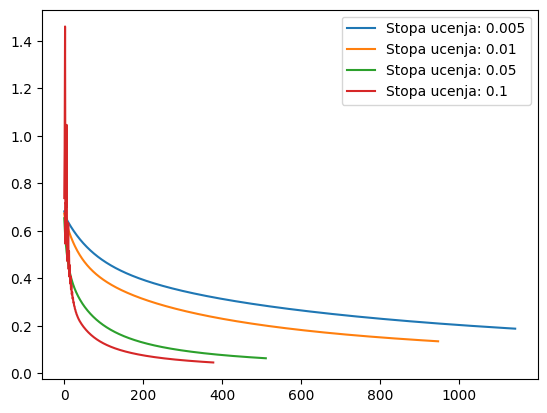

In [420]:
# Vaš kôd ovdje
#pogreška unakrsne entropije i klasifikacije 0-1
X3_4 = polynom3_2.fit_transform(seven_X)



h = np.array([sigm(np.sum(wi.T * X3_4, axis=1)) >= 0.5 for wi in tezinePoIteraciji])
pogreskaUnakrsna = [cross_entropy_error(X3_4, seven_y, wi) for wi in tezinePoIteraciji]
plt.plot(pogreskaUnakrsna, label="Pogreška unakrsne entropije")

pogreska01 = [zero_one_loss(seven_y, hi) for hi in h]
plt.plot(pogreska01, label="Pogreška 0-1")
plt.legend()


#pogreška unakrsne entropije za različite stope učenja
n = [0.005, 0.01, 0.05, 0.1]
plt.figure()

for stopaUcenja in n:
    tezine3_4, tezinePoIteraciji3_4 = lr_train(seven_X, seven_y, eta=stopaUcenja, trace=True)
    pogreskaUnakrsna = []
    for wi in tezinePoIteraciji3_4:
        pogreskaUnakrsna.append(cross_entropy_error(X3_4, seven_y, wi))

    plt.plot(pogreskaUnakrsna, label="Stopa ucenja: " + str(stopaUcenja))

plt.legend()
        





**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

Pogreska unakrsne entropije je: 2.220446049250313e-16


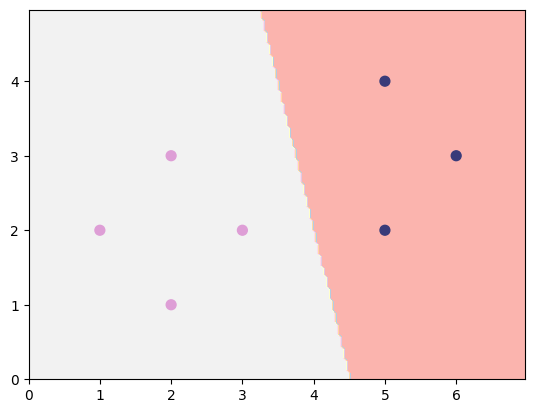

In [421]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Vaš kôd ovdje

logistickaRegresija = LogisticRegression().fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, logistickaRegresija.predict)
print("Pogreska unakrsne entropije je: " + str(log_loss(seven_y, logistickaRegresija.predict(seven_X) >= 0.5)))


### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [422]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

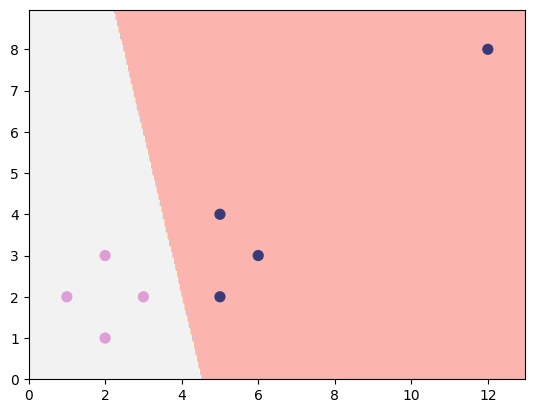

In [423]:
# Vaš kôd ovdje
logistickaRegresija.fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, logistickaRegresija.predict)


**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

Rješenje pronađeno u: 947 iteraciji.


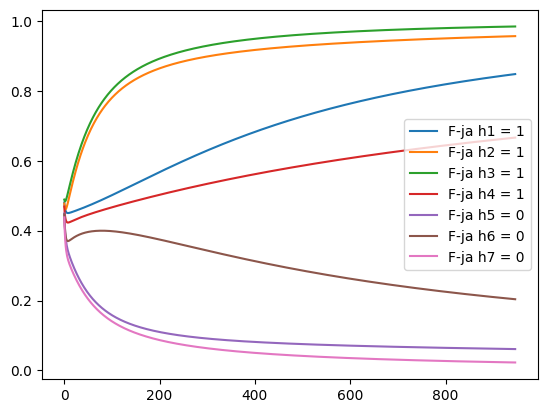

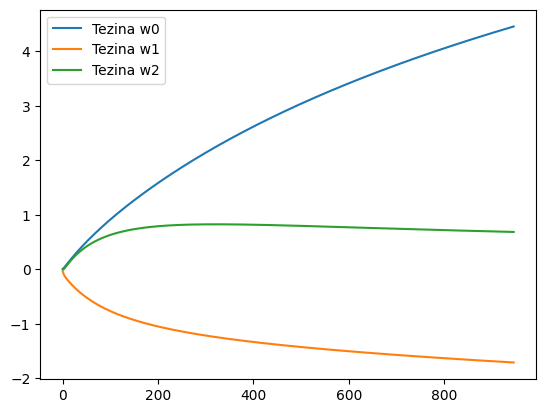

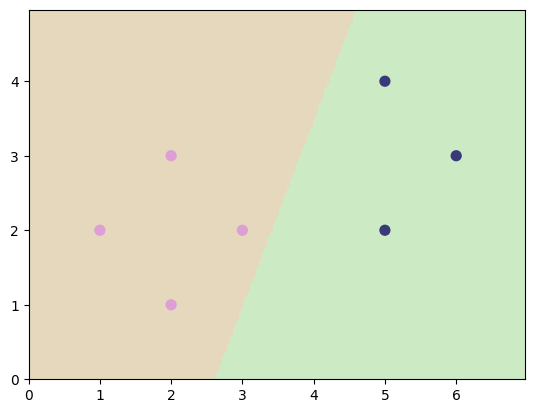

In [424]:
# Vaš kôd ovdje

tezine4_2, tezinePoIteraciji4_2 = lr_train(seven_X, seven_y, trace=True)
brojIteracija = list(range(0, len(tezinePoIteraciji4_2)))

funkcijaHUIteracijama = []
for wi in tezinePoIteraciji4_2:
    res = sigm(np.sum(np.transpose(wi) * polynom3_2.fit_transform(seven_X), axis = 1))
    funkcijaHUIteracijama.append(res)

funkcijaHUIteracijamaTransponirana = np.transpose(funkcijaHUIteracijama)
plt.figure()
for i in range(len(funkcijaHUIteracijamaTransponirana)):
    plt.plot(brojIteracija, funkcijaHUIteracijamaTransponirana[i], label="F-ja h" + str(i+1) + " = " + str(seven_y[i]))
plt.legend()
plt.show()

tezinePoIteraciji4_2Transponirane = np.transpose(tezinePoIteraciji4_2)
for i in range(len(tezinePoIteraciji4_2Transponirane)):
    plt.plot(brojIteracija, tezinePoIteraciji4_2Transponirane[i], label="Tezina w" + str(i))
plt.legend()
plt.show()

plot_2d_clf_problem(seven_X, seven_y, lambda x: sigm(np.sum(np.transpose(tezine4_2) * polynom3_2.fit_transform(x), axis=1)) >= 0.5)

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [425]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Rješenje pronađeno u: 454 iteraciji.


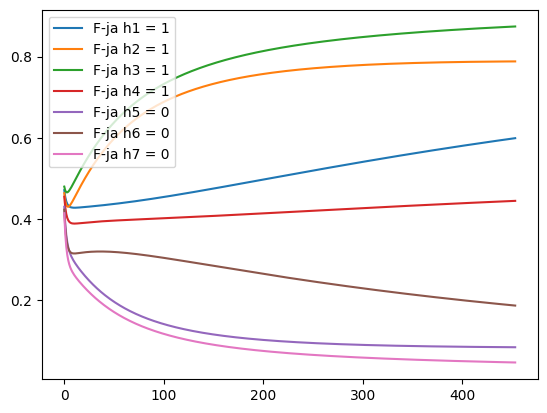

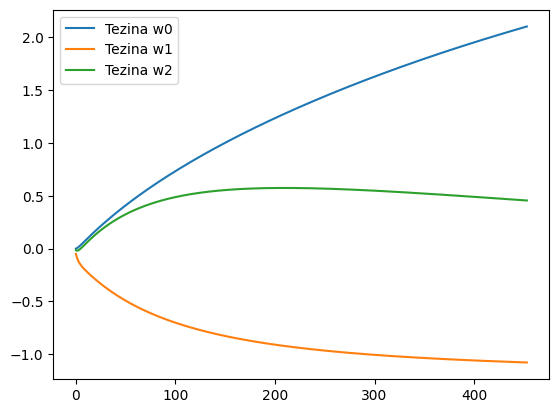

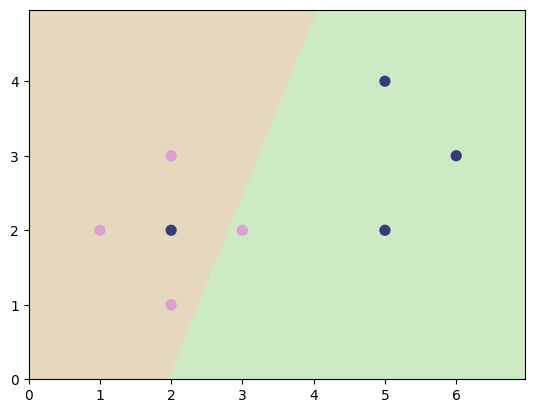

In [426]:
# Vaš kôd ovdje
tezine4_3, tezinePoIteraciji4_3 = lr_train(unsep_X, unsep_y, trace=True)
brojIteracija = list(range(0, len(tezinePoIteraciji4_3)))

funkcijaHUIteracijama = []
for wi in tezinePoIteraciji4_3:
    res = sigm(np.sum(np.transpose(wi) * polynom3_2.fit_transform(unsep_X), axis = 1))
    funkcijaHUIteracijama.append(res)

funkcijaHUIteracijamaTransponirana = np.transpose(funkcijaHUIteracijama)
plt.figure()
for i in range(len(funkcijaHUIteracijamaTransponirana) - 1):
    plt.plot(brojIteracija, funkcijaHUIteracijamaTransponirana[i], label="F-ja h" + str(i+1) + " = " + str(seven_y[i]))
plt.legend()
plt.show()

tezinePoIteraciji4_2Transponirane = np.transpose(tezinePoIteraciji4_3)
for i in range(len(tezinePoIteraciji4_2Transponirane)):
    plt.plot(brojIteracija, tezinePoIteraciji4_2Transponirane[i], label="Tezina w" + str(i))
plt.legend()
plt.show()

plot_2d_clf_problem(unsep_X, unsep_y, lambda x: sigm(np.sum(np.transpose(tezine4_3) * polynom3_2.fit_transform(x), axis=1)) >= 0.5)


**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [427]:
from numpy.linalg import norm

Rješenje pronađeno u: 947 iteraciji.
Rješenje pronađeno u: 804 iteraciji.
Rješenje pronađeno u: 405 iteraciji.
Rješenje pronađeno u: 4 iteraciji.


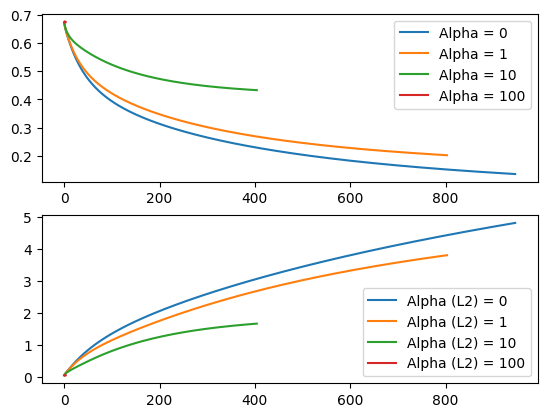

In [428]:
# Vaš kôd ovdje
logistickaRegresija5_1 = polynom3_2.fit_transform(seven_X)
alfe = [0, 1, 10, 100]

fig1, (ax1, ax2) = plt.subplots(2)
for alpha in alfe:
    tezine, tezinePoIteraciji5_1 = lr_train(seven_X, seven_y, alpha=alpha, trace=True)

    pogreske = []
    for wi in tezinePoIteraciji5_1:
        pogreske.append(np.array([cross_entropy_error(logistickaRegresija5_1, seven_y, wi), norm(wi)]))
    pogreske = np.array(pogreske)

    ax1.plot(pogreske[:,0], label= "Alpha = " + str(alpha))
    ax2.plot(pogreske[:,1], label= "Alpha (L2) = " + str(alpha))

ax1.legend()
ax2.legend()


**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [429]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

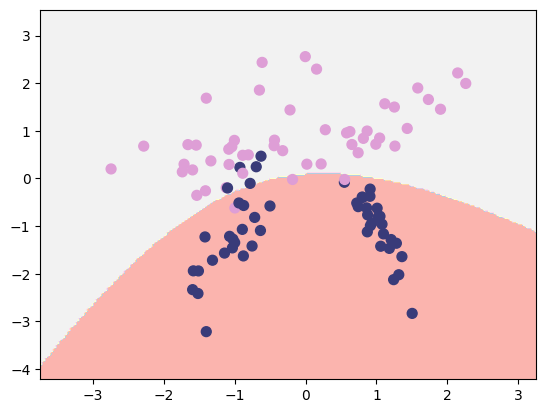

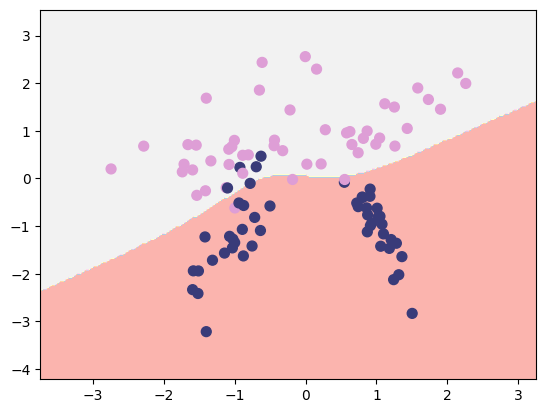

In [430]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
X6, y6 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=2)
polynom6 = PolynomialFeatures()
logistickaRegresija6 = LogisticRegression()

Xstupnja2 = polynom6.set_params(degree = 2).fit_transform(X6)
logistickaRegresija6.set_params().fit(Xstupnja2, y6)
plot_2d_clf_problem(X6, y6, lambda x: logistickaRegresija6.predict(polynom6.transform(x)))

plt.figure()
Xstupnja3 = polynom6.set_params(degree = 3).fit_transform(X6)
logistickaRegresija6.set_params().fit(Xstupnja3, y6)
plot_2d_clf_problem(X6, y6, lambda x: logistickaRegresija6.predict(polynom6.transform(x)))




**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?